In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
# adjust the configuration of the plot
plt.rcParams['figure.figsize']=(12,8) 
# read the data in python environment 
df=pd.read_csv('movies.csv')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### DATA CLEANING

In [2]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
for col in df.columns:
    print(df[col].isnull().value_counts(),"\n")

False    7668
Name: name, dtype: int64 

False    7591
True       77
Name: rating, dtype: int64 

False    7668
Name: genre, dtype: int64 

False    7668
Name: year, dtype: int64 

False    7666
True        2
Name: released, dtype: int64 

False    7665
True        3
Name: score, dtype: int64 

False    7665
True        3
Name: votes, dtype: int64 

False    7668
Name: director, dtype: int64 

False    7665
True        3
Name: writer, dtype: int64 

False    7667
True        1
Name: star, dtype: int64 

False    7665
True        3
Name: country, dtype: int64 

False    5497
True     2171
Name: budget, dtype: int64 

False    7479
True      189
Name: gross, dtype: int64 

False    7651
True       17
Name: company, dtype: int64 

False    7664
True        4
Name: runtime, dtype: int64 



In [7]:
df=df.dropna()

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# change dtype of columns 
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [10]:
df[['released','country_release']]=df['released'].str.split('\(',n=1,expand=True)


In [11]:
df['country_release']=df['country_release'].str.replace(')','',regex=False)

In [12]:
df['released'] = pd.to_datetime(df['released'].str.strip(), format='%B %d, %Y', errors='coerce')


In [13]:
# create correct year column
df['yearcorrect']=df['released'].astype(str).str[:4]

In [32]:
df.sort_values(by=['gross'],inplace=False,ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,386,5,0,2009,2009-12-18,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,47,29
7445,388,5,0,2019,2019-04-26,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,47,39
3045,4909,5,6,1997,1997-12-19,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,47,17
6663,3643,5,0,2015,2015-12-18,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,47,35
7244,389,5,0,2018,2018-04-27,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,47,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,2015-01-15,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,41,35
2434,2969,5,0,1993,1994-06-04,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,39,14
3681,1595,3,6,2000,2001-05-11,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,8,21
272,2909,6,9,1982,1982-03-12,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,47,2


In [15]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,2020-01-17,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,United States,2020
7649,Sonic the Hedgehog,PG,Action,2020,2020-02-14,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,United States,2020
7650,Dolittle,PG,Adventure,2020,2020-01-17,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,United States,2020
7651,The Call of the Wild,PG,Adventure,2020,2020-02-21,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,United States,2020


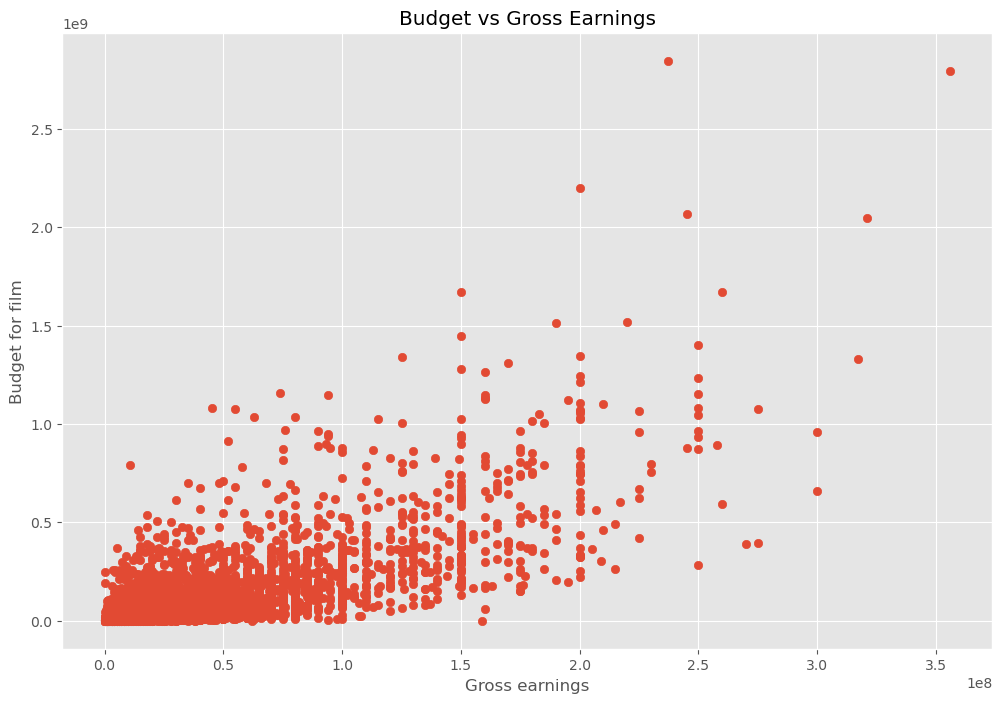

In [16]:
# Scatterplot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

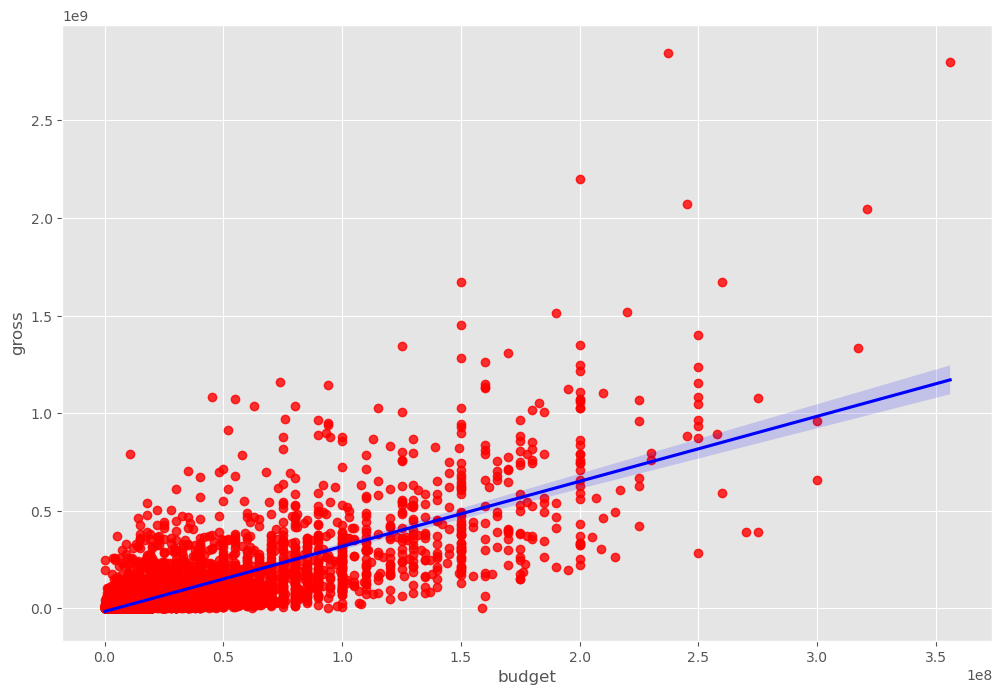

In [17]:
# plot the budget vs gross using seaborn
# sns.regplot(x='budget',y='gross',data=df,scatter_kws=['color':'red'],line_kws=['color':'blue'])
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [18]:
# looking at the correlation between Budget and gross in details
# pearson,kendull,spearman
df.corr(method='pearson',numeric_only=True)
# indicates high correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


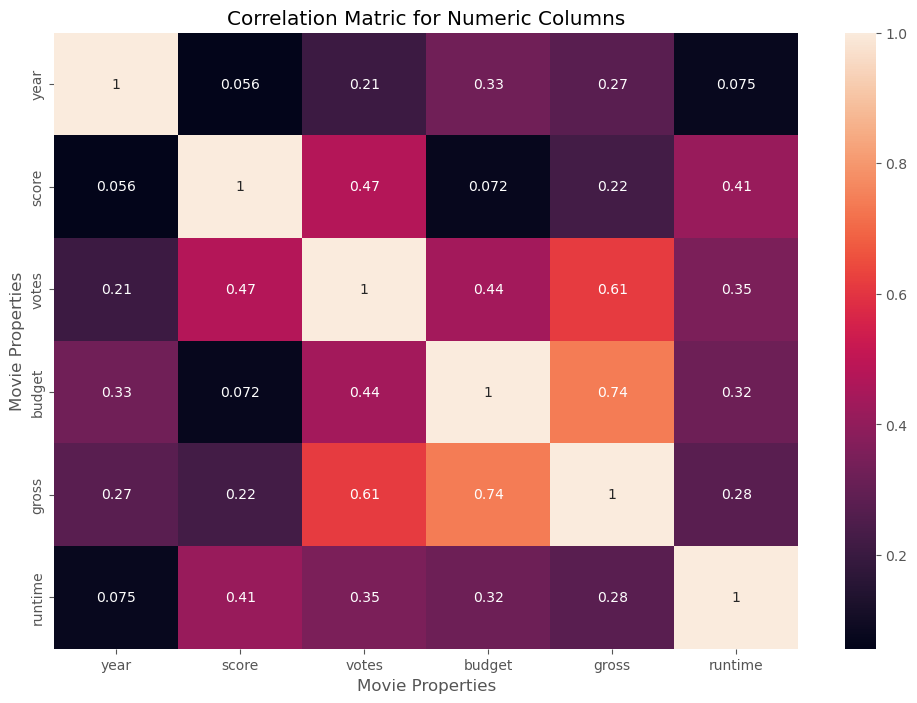

In [19]:
correlation_matrix=df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Columns')
plt.xlabel('Movie Properties')
plt.ylabel('Movie Properties')
plt.show()

In [21]:
df2=df
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,2020-01-17,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,United States,2020
7649,Sonic the Hedgehog,PG,Action,2020,2020-02-14,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,United States,2020
7650,Dolittle,PG,Adventure,2020,2020-01-17,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,United States,2020
7651,The Call of the Wild,PG,Adventure,2020,2020-02-21,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,United States,2020


In [22]:
# # Converting categorical columns to numeric values to aid correlation
df_numerized=df2
for col_name in df_numerized:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
0,4692,6,6,1980,1980-06-13,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,47,0
1,3929,6,1,1980,1980-07-02,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,47,0
2,3641,4,0,1980,1980-06-20,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,47,0
3,204,4,4,1980,1980-07-02,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,47,0
4,732,6,4,1980,1980-07-25,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,2020-01-17,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,47,40
7649,3556,4,0,2020,2020-02-14,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,47,40
7650,1153,4,1,2020,2020-01-17,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,47,40
7651,3978,4,1,2020,2020-02-21,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,47,40


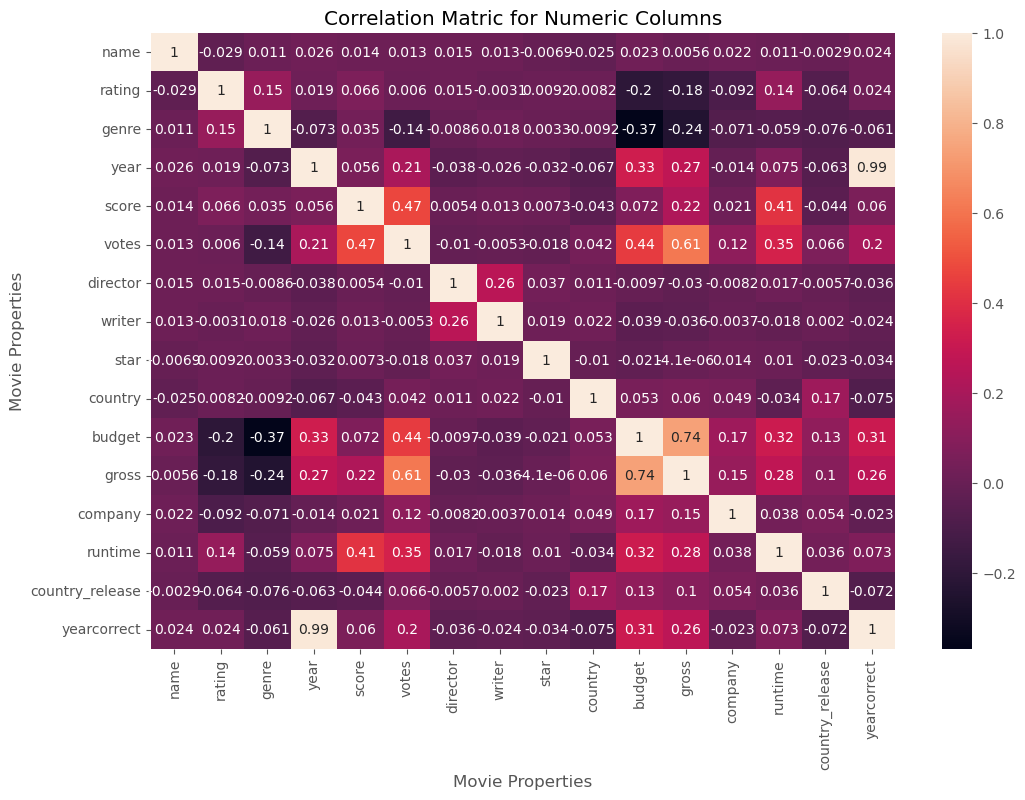

In [26]:
correlation_matrix=df_numerized.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Columns')
plt.xlabel('Movie Properties')
plt.ylabel('Movie Properties')
plt.show()

In [34]:
df_numerized.corr(numeric_only=True)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.002908,0.024136
rating,-0.029234,1.000000,0.147796,0.019499,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,-0.063883,0.023929
genre,0.010996,0.147796,1.000000,-0.073167,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.075552,-0.061186
year,0.025542,0.019499,-0.073167,1.000000,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,-0.062768,0.987770
score,0.014450,0.065983,0.035106,0.056386,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,-0.043528,0.059718
votes,0.012615,0.006031,-0.135990,0.206021,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.066105,0.198517
director,0.015246,0.014656,-0.008553,-0.038354,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.005705,-0.036329
writer,0.012880,-0.003149,0.017578,-0.025908,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.001983,-0.024179
star,-0.006882,0.009196,0.003341,-0.032157,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.023346,-0.034355
country,-0.025490,0.008230,-0.009164,-0.066748,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,0.167894,-0.074546


In [23]:
correlation_matrix=df_numerized.corr(numeric_only=True)

corr_pairs=correlation_matrix.unstack()

corr_pairs

name         name               1.000000
             rating            -0.029234
             genre              0.010996
             year               0.025542
             score              0.014450
                                  ...   
yearcorrect  gross              0.264334
             company           -0.022510
             runtime            0.073115
             country_release   -0.071625
             yearcorrect        1.000000
Length: 256, dtype: float64

In [24]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget           genre             -0.368523
genre            budget            -0.368523
gross            genre             -0.244101
genre            gross             -0.244101
rating           budget            -0.203946
                                      ...   
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
country_release  country_release    1.000000
yearcorrect      yearcorrect        1.000000
Length: 256, dtype: float64

In [30]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]

high_corr
# votes and budget had the highest correlation to Gross

votes            gross              0.614751
gross            votes              0.614751
                 budget             0.740247
budget           gross              0.740247
yearcorrect      year               0.987770
year             yearcorrect        0.987770
name             name               1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
country_release  country_release    1.000000
yearcorrect      yearcorrect        1.000000
dtype: flo